<h3>Importing packages</h3>

In [93]:
import pandas as pd
import numpy as np


<h3>Importing data</h3>

In [94]:
raw_csv_data=pd.read_csv('Index2018.csv')

In [95]:
df_comp=raw_csv_data.copy()

In [96]:
raw_csv_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [97]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


<h3>Plotting Data </h3>


In [98]:
import matplotlib.pyplot as plt

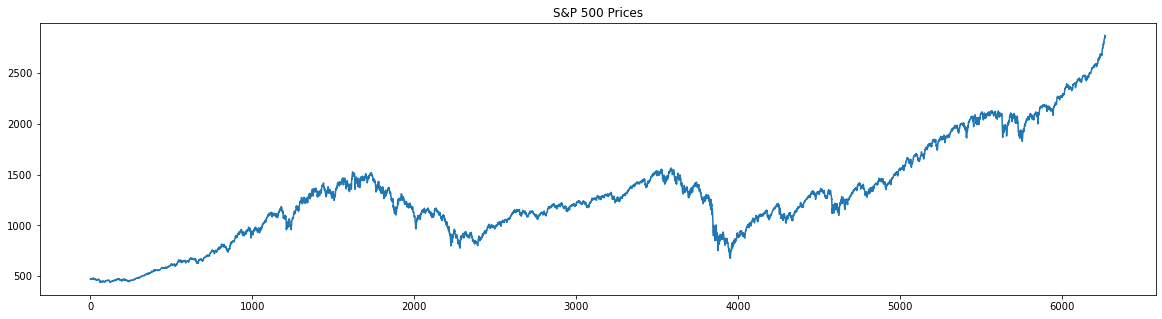

In [99]:
df_comp.spx.plot(figsize=(20,5,),title='S&P 500 Prices')
plt.show()

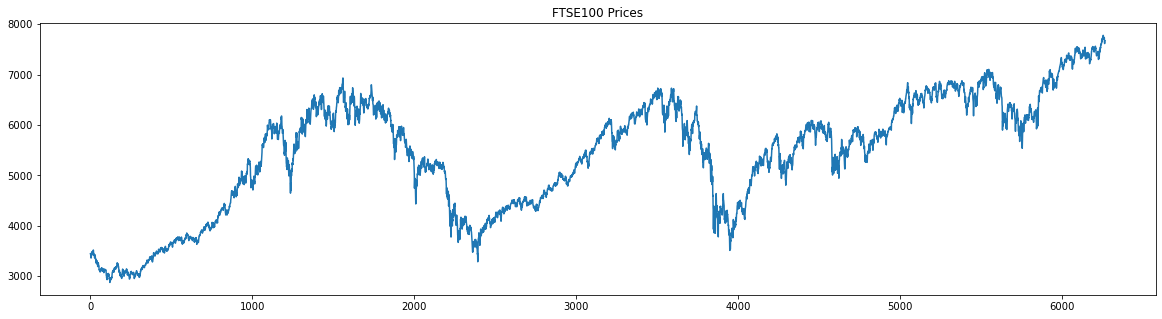

In [100]:
df_comp.ftse.plot(figsize=(20,5,),title='FTSE100 Prices')
plt.show()

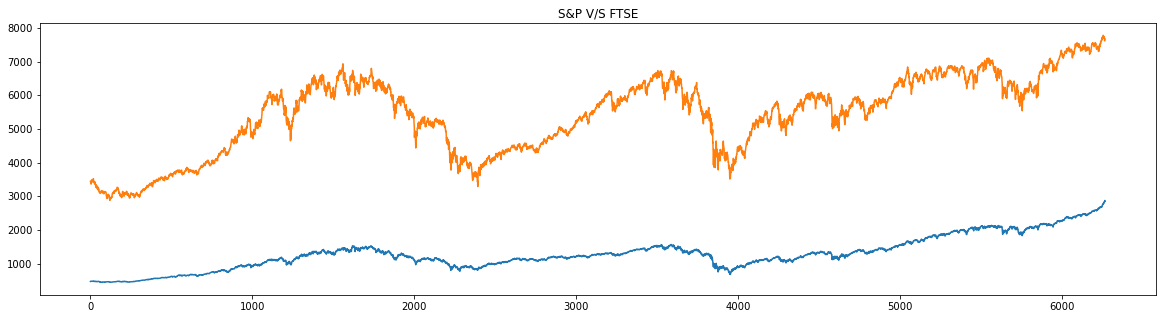

In [101]:
df_comp.spx.plot(figsize=(20,5,),title='S&P 500 Prices')
df_comp.ftse.plot(figsize=(20,5,),title='FTSE100 Prices')
plt.title('S&P V/S FTSE')
plt.show()

In [102]:
import scipy.stats
import pylab

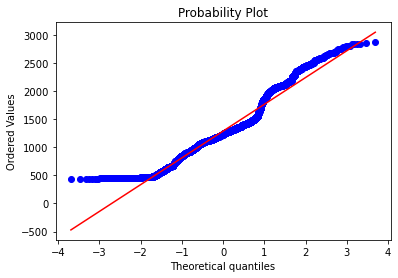

In [103]:
scipy.stats.probplot(df_comp.spx,plot=pylab)
pylab.show()

<h3>From text to Date</h3>

In [104]:
df_comp.date=pd.to_datetime(df_comp.date,dayfirst=True)

In [106]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [108]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [109]:
df_comp.set_index("date",inplace=True)

In [110]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


<h3>Setting desired Frequency</h3>

'h' - Hourly 'w'- weekly 'b'- business days 'd' - daily 'm' - monthly 'a' - annual

In [115]:
df_comp=df_comp.asfreq('b')

In [116]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


<h3>Handling Missing Values</h3>

In [130]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [128]:
#front-fill
df_comp.spx=df_comp.spx.fillna(method="ffill")

In [129]:
#back fill
df_comp.ftse=df_comp.ftse.fillna(method="bfill")

In [121]:
df_comp.dtypes

spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object

In [122]:
df_comp.dax.mean()

6080.063362577768

In [146]:
df_comp.rename(columns={'spx':'market value'},inplace=True)

In [151]:
del df_comp['dax'],df_comp['ftse'],df_comp['nikkei']

,market value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


<h3>Splitting Data</h3>

In [166]:
size=int(len(df_comp)*0.8)
df_train=df_comp[:size]
df_test=df_comp[size:]

In [167]:
display(df_train.tail())
display(df_test.head())

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


<h3>White Noise</h3>

In [165]:
df_train

,market value
date,
1994-01-07,469.900000
1994-01-10,475.270000
1994-01-11,474.130000
1994-01-12,474.170000
1994-01-13,472.470000
...,...
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978


In [168]:
wn=np.random.normal(loc=df_train.market_value.mean(),scale=df_train.std(),size=len(df_train))

In [169]:
df_train['wn']=wn

C:\Users\SF811YF\AppData\Local\Temp\ipykernel_19668\343528387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['wn']=wn


In [170]:
df_train.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1087.366613
std,292.559287,288.377819
min,438.920000,51.366960
25%,914.620000,886.535069
50%,1144.650000,1085.070767
75%,1316.280729,1279.873299
max,1570.252238,2164.647860
